In [1]:
import h5py
import numpy as np
from numpy.random import rand, randn, RandomState
from dppy.finite_dpps import FiniteDPP
from dppy.utils import example_eval_L_linear

In [2]:
feats_path = '/beegfs/work/sonyc/features/openl3/2017/sonycnode-b827eb132382.sonyc_features_openl3.h5'
blob = h5py.File(feats_path)
feats = blob['openl3']['openl3']
feats = feats.reshape(-1, 512)[:10000,:]
#print(feats.shape)

In [3]:
L = feats.dot(feats.T)
DPP = FiniteDPP('likelihood', **{'L': L})

In [4]:
DPP.flush_samples()
k = 10
#for _ in range(10):
DPP.sample_mcmc_k_dpp(size=k)
#DPP.sample_mcmc_k_dpp(size=k)

print(DPP.list_of_samples)

[[[4077, 4161, 5825, 574, 5799, 1561, 408, 7176, 6412, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 6412, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 2292], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 870], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 870], [4077, 4161, 5825, 574, 4290, 1561, 408, 7176, 134, 870], [4077, 4161, 5825, 574, 4290, 1561, 408, 1500, 134, 870]]]


**Correlation between the 10 embeddings sampled with DPP**

In [5]:
feats_idx = DPP.list_of_samples[0][0]
sel_feats = [feats[x] for x in feats_idx]
sel_feats = np.array(sel_feats)
#print(sel_feats.shape) (10, 512)

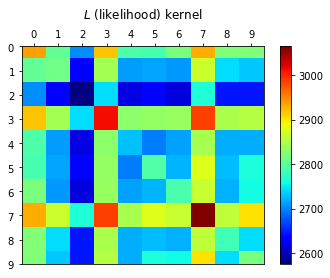

In [6]:
L = sel_feats.dot(sel_feats.T)
DPP = FiniteDPP('likelihood', **{'L': L})
DPP.plot_kernel()

**Correlation between the 10 random embeddings sampled randomly**

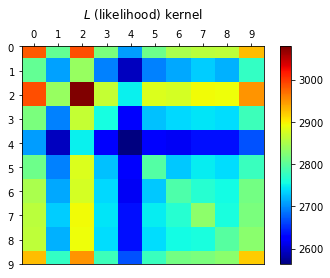

In [7]:
indexes = np.random.choice(feats.shape[0], k, replace=False)
rand_feats = feats[indexes]
#print(rand_feats.shape) (1000, 512)
L = rand_feats.dot(rand_feats.T)
DPP = FiniteDPP('likelihood', **{'L': L})
DPP.plot_kernel()

**Correlation between first 10 embeddings in the file**

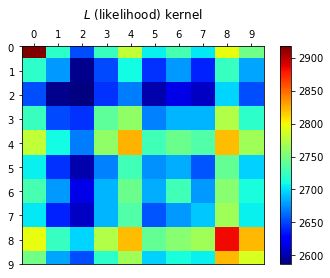

In [8]:
seq_feats = feats[:10,:]
L = seq_feats.dot(seq_feats.T)
DPP = FiniteDPP('likelihood', **{'L': L})
DPP.plot_kernel()